# Bag of words

The model has many, many use cases including:

- determining topics in a song
- filtering spam from your inbox
- finding out if a tweet has positive or negative sentiment
- creating word clouds

Bag-of-words (BoW) is a statistical language model based on word count. Also known as unigram model or n-gram modem (with n set to 1)

In [1]:
import nltk, re
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter

stop_words = stopwords.words('english')
normalizer = WordNetLemmatizer()

def get_part_of_speech(word):
  probable_part_of_speech = wordnet.synsets(word)
  pos_counts = Counter()
  pos_counts["n"] = len(  [ item for item in probable_part_of_speech if item.pos()=="n"]  )
  pos_counts["v"] = len(  [ item for item in probable_part_of_speech if item.pos()=="v"]  )
  pos_counts["a"] = len(  [ item for item in probable_part_of_speech if item.pos()=="a"]  )
  pos_counts["r"] = len(  [ item for item in probable_part_of_speech if item.pos()=="r"]  )
  most_likely_part_of_speech = pos_counts.most_common(1)[0][0]
  return most_likely_part_of_speech

def preprocess_text(text):
  cleaned = re.sub(r'\W+', ' ', text).lower()
  tokenized = word_tokenize(cleaned)
  normalized = [normalizer.lemmatize(token, get_part_of_speech(token)) for token in tokenized]
  return normalized

# Define text_to_bow() below:
def text_to_bow(some_text):
  bow_dictionary = {}
  tokens = preprocess_text(some_text)
  for token in tokens:
    if token in bow_dictionary:
      bow_dictionary[token] += 1
    else:
      bow_dictionary[token] = 1
  return bow_dictionary

print(text_to_bow("I love fantastic flying fish. These flying fish are just ok, so maybe I will find another few fantastic fish..."))

{'i': 2, 'love': 1, 'fantastic': 2, 'fly': 2, 'fish': 3, 'these': 1, 'be': 1, 'just': 1, 'ok': 1, 'so': 1, 'maybe': 1, 'will': 1, 'find': 1, 'another': 1, 'few': 1}


## Bow vectors

Sometimes a dictionary just won’t fit the bill. Topic modelling applications, for example, require an implementation of bag-of-words that is a bit more mathematical: feature vectors.

The features of each document are the words, and their values count how often they appear.  This can be converted into a vector

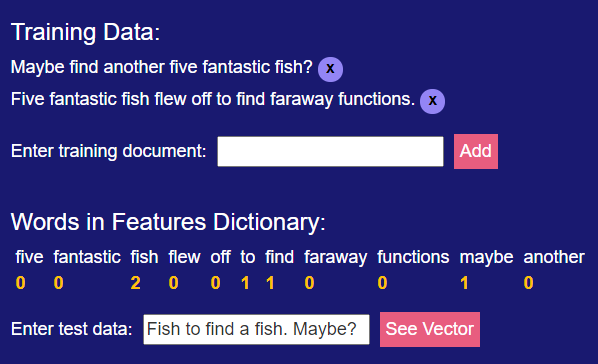

In [2]:
def create_features_dictionary(documents):
  features_dictionary = {}
  merged = " ".join(documents)
  tokens = preprocess_text(merged)
  index = 0
  for token in tokens:
    if token not in features_dictionary:
      features_dictionary[token] = index
      index += 1
  return features_dictionary, tokens


training_documents = ["Five fantastic fish flew off to find faraway functions.", "Maybe find another five fantastic fish?", "Find my fish with a function please!"]

print(create_features_dictionary(training_documents)[0])

{'five': 0, 'fantastic': 1, 'fish': 2, 'fly': 3, 'off': 4, 'to': 5, 'find': 6, 'faraway': 7, 'function': 8, 'maybe': 9, 'another': 10, 'my': 11, 'with': 12, 'a': 13, 'please': 14}


In [3]:
def text_to_bow_vector(some_text, features_dictionary):
    bow_vector = [0] * len(features_dictionary)
    tokens = preprocess_text(some_text)
    for token in tokens:
        bow_vector[features_dictionary[token]] += 1
    return bow_vector, tokens

features_dictionary = {'function': 8, 'please': 14, 'find': 6, 'five': 0, 'with': 12, 'fantastic': 1, 'my': 11, 'another': 10, 'a': 13, 'maybe': 9, 'to': 5, 'off': 4, 'faraway': 7, 'fish': 2, 'fly': 3}

text = "Another five fish find another faraway fish."
print(text_to_bow_vector(text, features_dictionary)[0])

## Scikit learn approach

Text to bow can be done by counter

In [4]:
from collections import Counter

tokens = ['another', 'five', 'fish', 'find', 'another', 'faraway', 'fish']
print(Counter(tokens))

Counter({'another': 2, 'fish': 2, 'five': 1, 'find': 1, 'faraway': 1})


For vectorization, you can use CountVectorizer from the machine learning library scikit-learn. You can use fit() to train the features dictionary and then transform() to transform text into a vector:

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

training_documents = ["Five fantastic fish flew off to find faraway functions.", "Maybe find another five fantastic fish?", "Find my fish with a function please!"]
test_text = ["Another five fish find another faraway fish."]
bow_vectorizer = CountVectorizer()
bow_vectorizer.fit(training_documents)
bow_vector = bow_vectorizer.transform(test_text)
print(bow_vector.toarray())

[[2 0 1 1 2 1 0 0 0 0 0 0 0 0 0]]


In [ ]:
from spam_data import training_spam_docs, training_doc_tokens, training_labels, test_labels, test_spam_docs, training_docs, test_docs
from sklearn.naive_bayes import MultinomialNB
# Import CountVectorizer from sklearn:
from sklearn.feature_extraction.text import CountVectorizer

# Define bow_vectorizer:
bow_vectorizer = CountVectorizer()

# Define training_vectors:
# fit_transform() does two things: creation of the features dictionary and the vectorization of the training data.
training_vectors = bow_vectorizer.fit_transform(training_docs)

# Define test_vectors:
test_vectors = bow_vectorizer.transform(test_docs)

spam_classifier = MultinomialNB()

def spam_or_not(label):
  return "spam" if label else "not spam"

# Uncomment the code below when you're done:
spam_classifier.fit(training_vectors, training_labels)

predictions = spam_classifier.score(test_vectors, test_labels)

print("The predictions for the test data were {0}% accurate.\n\nFor example, '{1}' was classified as {2}.\n\nMeanwhile, '{3}' was classified as {4}.".format(predictions * 100, test_docs[7], spam_or_not(test_labels[7]), test_docs[15], spam_or_not(test_labels[15])))

Because bag-of-words relies on single words, rather than sequences of words, there are more examples of each unit of language in the training corpus. More examples means the model has less data sparsity (i.e., it has more training knowledge to draw from) than other statistical models.

Unless you want sentences that look like “the a but for the”, BoW is NOT a great primary model for text prediction. If that sort of “sentence” isn’t your bag, it’s because bag-of-words has high perplexity, meaning that it’s not a very accurate model for language prediction. The probability of the following word is always just the most frequently used words.